# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

## Upload Dataset

In [2]:
data=pd.read_csv('titanic.csv',usecols=['Age','SibSp','Parch'])
data.sample(5)

,Age,SibSp,Parch
564,NaN,0,0
846,NaN,8,2
730,29.0,0,0
577,39.0,1,0
450,36.0,1,2


In [3]:
data['Family']=data['SibSp']+data['Parch']

In [4]:
data.drop(['SibSp','Parch'],axis=1,inplace=True)

## Data Analysis

In [5]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])
data.shape

Number of Rows 891
Number of Columns 2


(891, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   Family  891 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 14.0 KB


In [7]:
data.describe()

,Age,Family
count,714.000000,891.000000
mean,29.699118,0.904602
std,14.526497,1.613459
min,0.420000,0.000000
25%,20.125000,0.000000
50%,28.000000,0.000000
75%,38.000000,1.000000
max,80.000000,10.000000


In [8]:
data.corr()

,Age,Family
Age,1.000000,-0.301914
Family,-0.301914,1.000000


## Data Cleaning

In [9]:
print("Is there any Null value\n",data.isnull().any())

Is there any Null value
 Age        True
Family    False
dtype: bool


In [10]:
data.dropna(subset=['Age'],axis=0,how="any",inplace=True)

In [11]:
data.shape

(714, 2)

## Data visualize

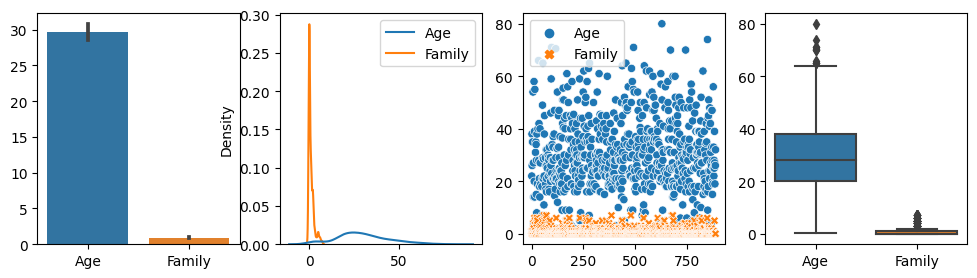

In [12]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(ncols=4,figsize=(12,3))

sns.barplot(data=data,ax=ax1)
sns.kdeplot(data=data,ax=ax2)
sns.scatterplot(data=data,ax=ax3)
sns.boxplot(data=data,ax=ax4)
plt.show()

In [58]:
X=data.drop("Family",axis=1)
y=data['Family']

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (499, 1)
x_test (215, 1)
y_train (499,)
y_test (215,)


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()

sc.fit(x_train)

x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)


In [62]:
x_train_sc=pd.DataFrame(x_train_sc,columns=x_train.columns)
x_test_sc=pd.DataFrame(x_test_sc,columns=x_test.columns)

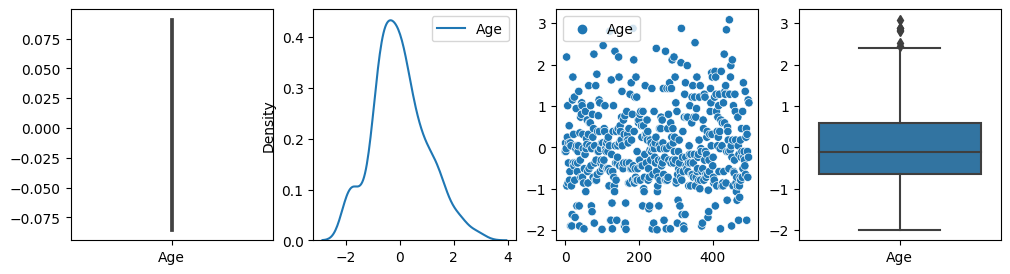

In [63]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(ncols=4,figsize=(12,3))

sns.barplot(data=x_train_sc,ax=ax1)
sns.kdeplot(data=x_train_sc,ax=ax2)
sns.scatterplot(data=x_train_sc,ax=ax3)
sns.boxplot(data=x_train_sc,ax=ax4)

plt.show()

In [64]:
data.skew()

Age       0.389108
Family    2.010600
dtype: float64

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


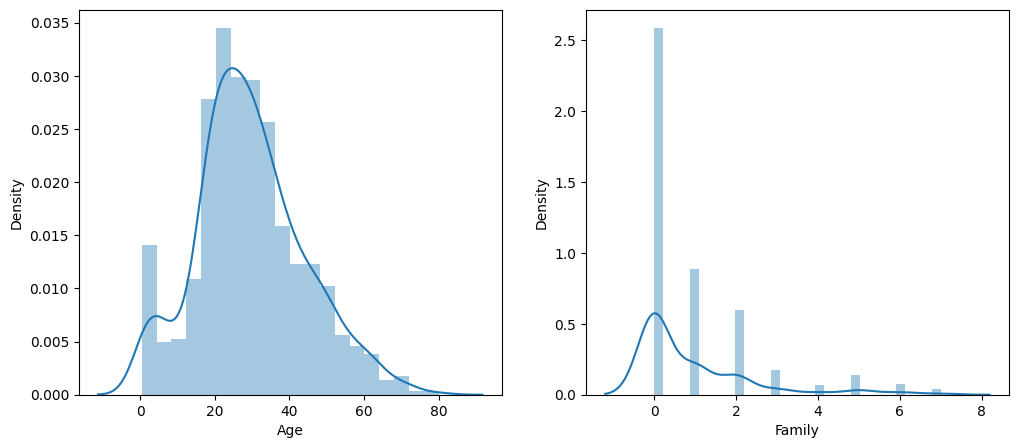

In [65]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

sns.distplot(data['Age'],ax=ax1)
sns.distplot(data['Family'],ax=ax2)


plt.show()

In [66]:
upper_limit_age=data['Age'].quantile(0.99)
lower_limit_age=data['Age'].quantile(0.01)
print("upper_limit_age",upper_limit_age)
print("lower_limit_age",lower_limit_age)

upper_limit_age 65.87
lower_limit_age 1.0


In [67]:
new_data=data[(data['Age']>=1.0) & (data['Age']<=63.999)]


C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


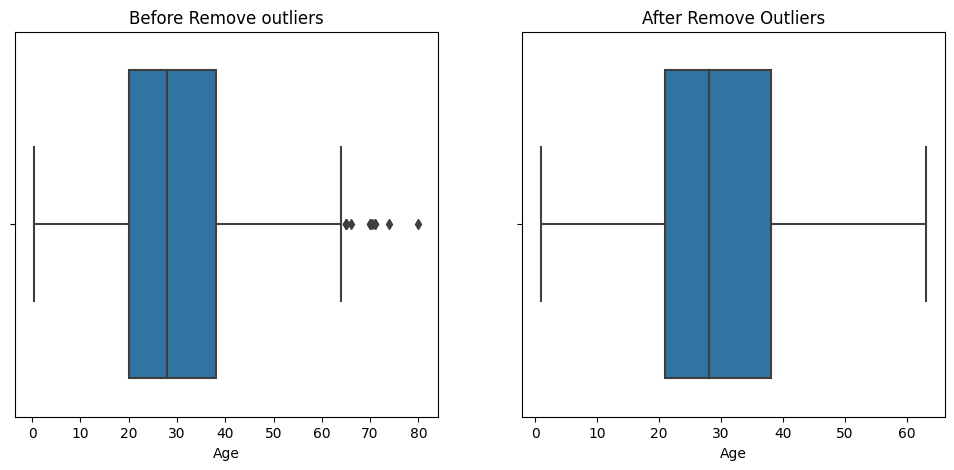

In [68]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before Remove outliers')
sns.boxplot(data['Age'],ax=ax1)
ax2.set_title("After Remove Outliers")
sns.boxplot(new_data['Age'],ax=ax2)


plt.show()

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


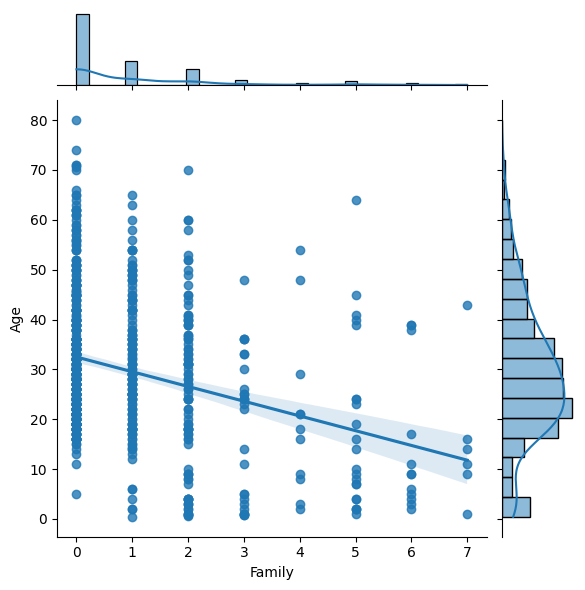

In [70]:
sns.jointplot(data['Family'],data['Age'],kind="reg")
plt.show()

## Now Working on Predict the Data

In [71]:
lr=LinearRegression()

lr.fit(x_train,y_train)


LinearRegression()

In [72]:
y_pred=lr.predict(x_test)
y_pred

array([ 1.00625798,  0.27760464,  1.903164  ,  0.74129313,  1.07249919,
        0.74129313,  0.90689616, -0.21920446, -0.21920446,  0.37696646,
        1.20498162,  1.07249919,  1.80115253,  0.64193131,  1.23810222,
        0.1120016 ,  0.84065495,  1.90879451,  1.1387404 ,  0.64193131,
        1.27122283,  0.6088107 ,  1.46994647,  0.97313737,  0.94001677,
        1.90879451,  0.74129313,  1.23810222,  1.03937859,  0.6088107 ,
        0.87377555,  1.86739375,  1.27122283,  0.21136342,  0.77441373,
        0.54256949,  0.67505191,  0.74129313,  1.27122283,  1.43682586,
        1.20498162,  1.23810222,  0.54256949,  1.23810222,  1.00625798,
        1.76803193,  1.83427314,  1.1387404 ,  0.77441373,  1.00625798,
        0.67505191,  1.1387404 ,  1.1056198 ,  0.87377555,  0.04576039,
        1.1056198 ,  1.50306708,  1.1056198 , -0.11984264,  0.54256949,
        0.67505191,  0.24448403,  1.07249919,  1.27122283,  1.40370526,
        0.97313737,  0.6088107 ,  0.77441373,  1.86739375,  1.17

In [73]:
print("Mean Absolute Error (MAE)",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE)",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

Mean Absolute Error (MAE) 1.0080686464539867
Mean Squared Error (MSE) 1.747896431460193
R2 score 0.0682414310924715


In [74]:
## y_test or y_pred convert into dataset
comparing=pd.DataFrame({"Actual":y_test,"Prediction":y_pred})
comparing.sample(5)

,Actual,Prediction
666,0,1.105620
609,0,0.608811
403,1,1.006258
469,3,1.908795
346,0,0.608811


In [75]:
comparing.describe().round(1)

,Actual,Prediction
count,215.0,215.0
mean,0.9,0.9
std,1.4,0.5
min,0.0,-0.7
25%,0.0,0.7
50%,0.0,1.0
75%,1.0,1.2
max,6.0,1.9


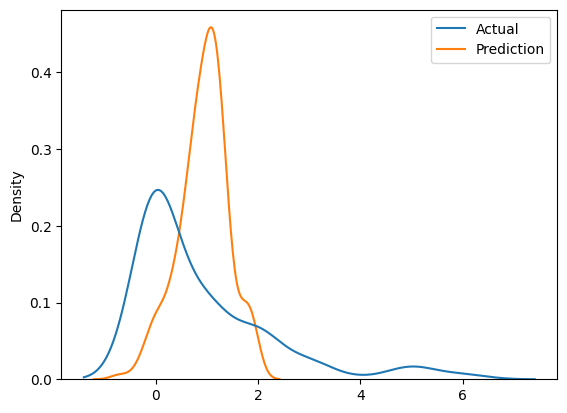

In [76]:
sns.kdeplot(data=comparing)
plt.show()